# Motivating example

This notebook presents a simple example to show the interest of working in the frequency domain.

## Generating a noisy data stream

We start by generating a signal made of a sum of cosine functions.

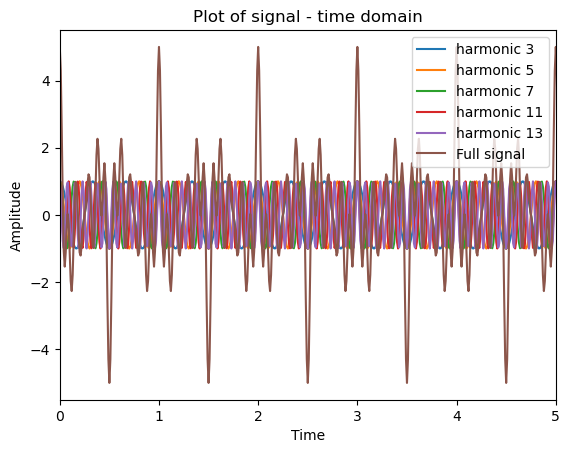

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Sampling interval
delta_t = 0.01
# Sampling rate
f_s = 1/delta_t      


def generate_harmonics(t, harmonics, freq = 1):
    harmonic_components = [np.cos(2*np.pi*n*freq*t) for n in harmonics]
    return harmonic_components


# This creates a vector of times between 0 and 10 evenly spaced by delta_t
t = np.arange(0, 10, delta_t)

# Individual signals of different harmonics m = {3,5,7,11,13}.
harmonics = [3, 5, 7, 11, 13]
harmonic_components = generate_harmonics(t, harmonics)

# Sum the harmonics
signal = sum(harmonic_components)

# Plot the signal and the harmonics
for harmonic, harmonic_components in zip(harmonics, harmonic_components):
    plt.plot(t, harmonic_components, label=f"harmonic {harmonic}")
plt.plot(t, signal, label=f"Full signal")
plt.xlim([0, 5])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Plot of signal - time domain')
plt.legend(loc='upper right');

Now, let's add some Gaussian white noise.

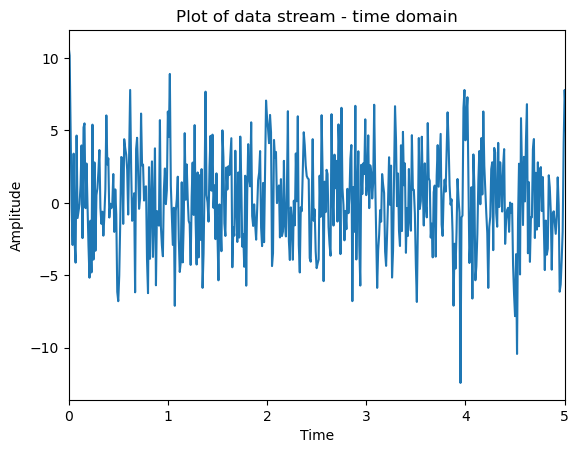

In [26]:
# Set seed
np.random.normal(11_07_1993)
# Add noise

sigma_sqr = 8
noise = np.random.normal(0,np.sqrt(sigma_sqr), len(t))
data = signal + noise

plt.plot(t, data)
plt.xlim([0, 5])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Plot of data stream - time domain');

As you can see, it's hard to see the signal in the time domain.

## Representation in the frequency domain

Let's now tranform the signal and the data stream to the frequency domain.

In [27]:
# Calculate maximum resolvable frequency
critical_frequency = f_s / 2

In [28]:
# Frequencies at which the FFT will be computed
freq = np.fft.rfftfreq(len(t), delta_t)

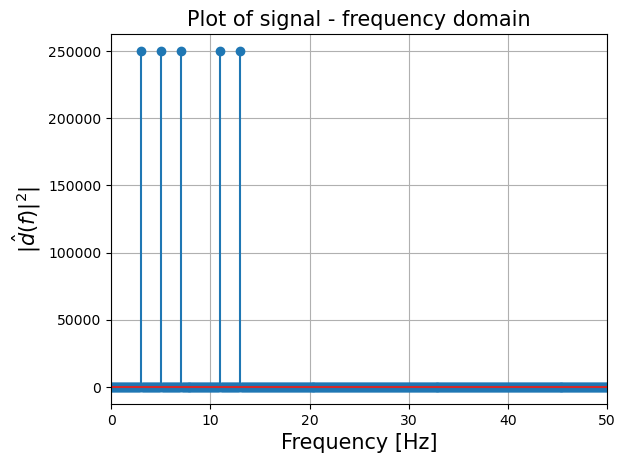

In [35]:
# Transform the signal to frequency domain
dft_signal = np.fft.rfft(signal)

plt.stem(freq, np.abs(dft_signal)**2)
plt.xlabel(r'Frequency [Hz]',fontsize = 15)
plt.ylabel(r'$|\hat{d}(f)|^{2}|$',fontsize = 15)
plt.xlim([0, critical_frequency])
plt.title('Plot of signal - frequency domain',fontsize = 15)
plt.grid();

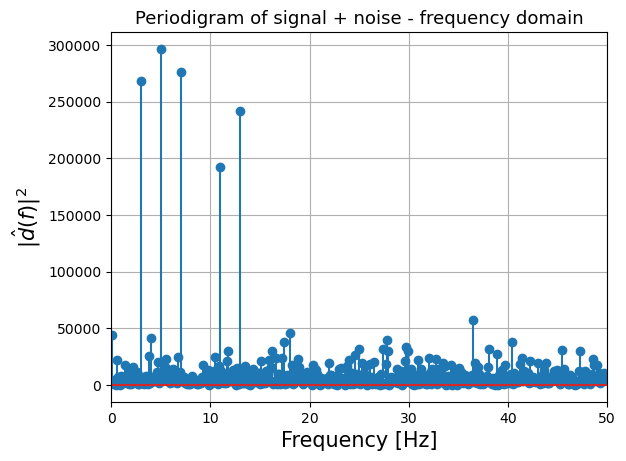

In [34]:
# Transform the noisy data stream to frequency domain
dft_data = np.fft.rfft(data)

plt.stem(freq, np.abs(dft_data)**2)
plt.xlabel(r'Frequency [Hz]',fontsize = 15)
plt.ylabel(r'$|\hat{d}(f)|^{2}$',fontsize = 15)
plt.xlim([0, critical_frequency])
plt.title('Periodigram of signal + noise - frequency domain',fontsize = 13);
plt.grid()

As you can see, in the frequency domain, the signal is much easier to recognize in the noisy data stream.